In [2]:
import sys
sys.path.append('/home/ABTLUS/victor.secco/data_processing') 
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import hyperspy.api as hs
import cv2
from mypackages.edp_processing import ImageAnalysis, ImageProcessing
import gc

In [33]:
#Batch processing large dataset of images
directory = '/home/ABTLUS/victor.secco/data_processing/ED_data/Gain/Linearity'
names = [x for x in os.listdir(directory) if x.endswith('.ser')] 

# Initialize variables to hold the running mean

from matplotlib.patches import Circle

for i, name in enumerate(names):
    file_path = os.path.join(directory, name)
    # Load the data lazily and change its dtype to float for accurate mean calculation
    signal = hs.load(file_path, signal_type='diffraction', lazy=True)
    signal.change_dtype("int16")
    
    # Compute the mean of the current signal

    
    
    output_path = os.path.join(directory, 'npy_files')
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    np.save(os.path.join(output_path, f'{name[:-4]}_mean.npy'), np.array(signal.mean(axis=0)))
    
    #np.save(os.path.join(output_path, f'{name[:-4]}_std.npy'), np.array(signal.std(axis = 0)))
    del signal
    gc.collect()
    


In [ ]:
#Averaging and saving to .npy files
npy_path = os.path.join(directory, 'npy_files')
files = [f for f in os.listdir(npy_path) if f.endswith('.npy')]


mean_sum_array = np.zeros((4096, 4096), dtype=np.int16)
std_sum_array = np.zeros((4096, 4096), dtype=np.int16)

# Iterate over each file and add it to sum_array
for file in files:
    # Construct full file path
    if file.endswith('mean.npy'):
        file_path = os.path.join(npy_path, file)
    
    # Load the numpy array
    current_array = np.load(file_path)
    
    # Check if the current array is of int16 type, convert if not
    if current_array.dtype != np.int16:
        current_array = current_array.astype(np.int16)
    
    # Sum the current array with the sum_array
    mean_sum_array += current_array

mean_files = [x for x in files if x.endswith('mean.npy')]
mean_sum_array = mean_sum_array/len(mean_files)

for file in files:
    # Construct full file path
    if file.endswith('std.npy'):
        file_path = os.path.join(npy_path, file)
    
    # Load the numpy array
    current_array = np.load(file_path)
    
    # Check if the current array is of int16 type, convert if not
    if current_array.dtype != np.int16:
        current_array = current_array.astype(np.int16)
    
    # Sum the current array with the sum_array
    std_sum_array += current_array

std_files = [x for x in files if x.endswith('std.npy')]
std_sum_array = std_sum_array/len(std_files)


np.save(os.path.join(npy_path, 'std.npy'), np.array(std_sum_array))
np.save(os.path.join(npy_path, 'mean.npy'), np.array(mean_sum_array))


In [ ]:
directory = '/home/ABTLUS/victor.secco/data_processing/TEM_data/07Feb24/Corning_Gain/Dark'

names = [x for x in os.listdir(directory) if x.endswith('.ser')] 

all_signals = []

for name in names:
    file_path = os.path.join(directory, name)
    # Load the data lazily
    signal = hs.load(file_path, signal_type='diffraction', lazy=True)
    all_signals.append(signal)

# Use Hyperspy's concatenate to merge all lazy signals into one big lazy signal
if all_signals:
    big_lazy_signal = hs.signals.Signal1D.concatenate(all_signals, axis=0, lazy=True)

In [ ]:
fid = '/home/ABTLUS/victor.secco/data_processing/TEM_data/07Feb24/Corning_Gain/White/npy_files/mean.npy'
output_path = os.path.join(os.path.dirname(fid), 'white_mean.tif')

data = np.load(fid)
std_image_dark = Image.fromarray(data)
std_image_dark.save(output_path)

In [23]:
directory = "/home/ABTLUS/victor.secco/data_processing/ED_data/Gain/1.0 nA/1nA_4.8kx_C2_49.628_C3_38.467_Spot3_Screen1nA"

process = ImageProcessing(directory)
signal, names = process.load_images(num_images=10)

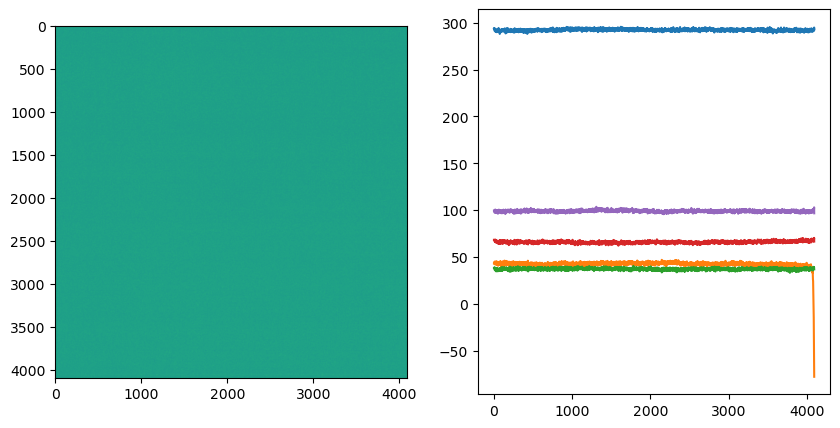

In [141]:
#white = signal.mean(axis = 0)

f,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(white)
ax[1].plot(white.mean(axis=0))
ax[1].plot(nine_angstrom.mean(axis=0))
ax[1].plot(twenty_ansgtrom.mean(axis=0))
ax[1].plot(five_ansgtrom.mean(axis=0))
ax[1].plot(three_ansgtrom.mean(axis=0))